In [1]:
%load_ext autoreload
%autoreload 2

import sys
import numpy as np
import pandas as pd
%matplotlib inline
from IPython.display import display

sys.path.append('../Runs')
from train_QTable import optimal_strategy, run
from helper.Q_learning import QLearn, round_custombase
from helper.manage_orderbooks_v2 import OrderbookEpisodesGenerator
from helper.orderbook_trader import OrderbookTradingSimulator

In [2]:
experiment_name='1611_USDTBTC_Qtable_100vol10_60T4___1datapoint'
inputfile='/home/axel/data/small/obs_2016-11_USDT_BTC_maxVol100.dict'
outputfile_model='q.json'
volume=100
volume_intervals=10
decision_points=4
period_length=15
action_min=-0.4
action_max=1.0
action_count=15
folder='experiments'
plotQ=False
state_variables=['volume','time']
actions = list(np.linspace(action_min, action_max, num=action_count))

episodes_train = OrderbookEpisodesGenerator(filename=inputfile,
                                                episode_length=decision_points*period_length)

agent = optimal_strategy(traingdata=episodes_train[:1], V=volume, T=decision_points,
                          period_length=period_length, vol_intervals=volume_intervals,
                          actions=actions, outputfolder=folder, experiment_name=experiment_name,
                          state_variables=state_variables, plotQ=plotQ, outputfile_model=outputfile_model)

  0%|          | 0/4 [00:00<?, ?it/s]
0it [00:00, ?it/s]

RL-Type: <class 'agents.QTable_Agent.QTable_Agent'>



1it [00:40, 40.03s/it]
 25%|██▌       | 1/4 [00:40<02:00, 40.03s/it]
0it [00:00, ?it/s]

Saved: 'q.json'



1it [00:28, 28.43s/it]
 50%|█████     | 2/4 [01:08<01:13, 36.56s/it]
0it [00:00, ?it/s]

Saved: 'q.json'



1it [00:28, 28.09s/it]
 75%|███████▌  | 3/4 [01:36<00:34, 34.02s/it]
0it [00:00, ?it/s]

Saved: 'q.json'



1it [00:07,  7.52s/it]
100%|██████████| 4/4 [01:44<00:00, 26.07s/it]

Saved: 'q.json'


trained on 10 windows


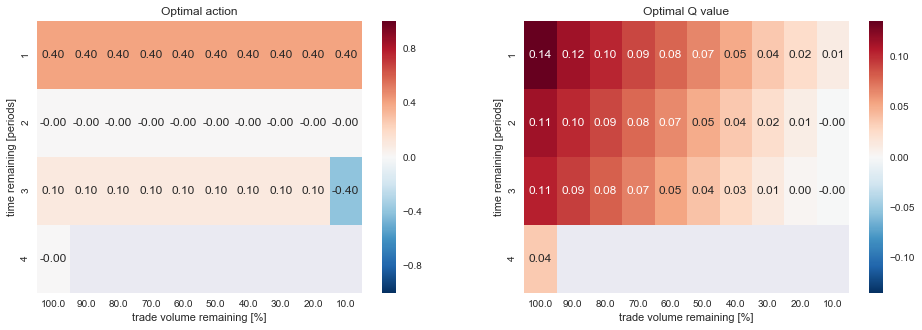

3it [00:13,  4.32s/it]


,QTable_Agent
2016-11-08T10:00,0.053568
2016-11-08T11:01,0.231074
2016-11-08T12:01,0.127136


QTable_Agent    0.13726
dtype: float64

In [3]:
print("trained on 10 windows")
agent.heatmap_Q()
costs = agent.evaluate(testdata=episodes_train[:3], verbose=False)

display(costs)
display(costs.mean())